# 선형회귀 (Linear Regression)

선형회귀분석이란 관찰된 데이터들을 기반으로 하나의 함수를 구해서 관찰되지 않은 데이터의 값을 예측하는 것을 의미한다.  
선형회귀는 회귀 계수들이 선형 결합된 함수를 뜻한다.  

### 평균 제곱 오차로 더 나은 회귀 함수 선택하기
데이터포인트에서 함수의 선까지의 거리를 제곱함으로써 항상 양수의 거리값을 얻고, 두 개의 회귀를 비교했을 때 쉽게 어느 회귀가 더 나은지 비교할 수 있다. 
이처럼 각 데이터포인트로부터 함수까지의 거리를 제곱한 값을 평균낸 값을 평균제곱오차(MSE, eman squared error)라고 한다.

### 선형회귀의 목적 함수
목적함수(objective function)란 보통 어떤 함수의 최대값 또는 최소값을 구하는 함수이다.  
회귀 모델을 구현할 때의 목적함수는 평균제곱오차를 최소화하는 함수라고 정의할 수 있다.

### 경사하강법
회귀 모델을 구현할 때 최초 회귀 계수를 임의값으로 설정한 후, 경사하강법을 반복적으로 실행해 최소의 평균제곱오차를 가지는 회귀 계수(θ)를 구한다.  
-(미분값 * ⍺)만큼 θ의 값을 변경해서 변곡점에 더 가까운 값으로 이동한다. ⍺는 학습률(learning rate)를 의미한다.  
⍺의 값이 클수록 θ의 값이 크게 변경되며, ⍺의 값이 작을수록 θ이 적게 변경된다.

y=wx의 형태를 갖는 간단한 선형 회귀를 실습해보자


In [1]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 데이터 생성하기
numpy를 활용하여 선형회귀에 사용될 데이터를 간단하게 만든다.  
먼저 0에서부터 10까지 총 10개의 x값을 만들고, 그에 해당하는 y값은 x에 임의의 수를 더한 값으로 생성한다.  
이번 실습을 통해 임의로 분포된 데이터에 가장 적합하게 적용할 수 있는 w를 찾는다.  

In [2]:
X = np.linspace(0,10,10)
Y = X + np.random.randn(*X.shape)

## 데이터 조회
임의로 생성된 데이터를 조회한다. y=wx라는 식을 통해 모든 데이터를 통과하는 직전은 구할 수 없다는 것을 확인할 수 있다.  
선형회귀를 사용함으로써 모든 데이터를 통과하지는 못하지만 가장 적절하게 근사값을 구할 수 있는 w는 찾을 수 있다

In [3]:
for x,y in zip(X,Y):
    print((round(x,1), round(y,1)))

(0.0, -0.2)
(1.1, 1.2)
(2.2, 1.8)
(3.3, 4.8)
(4.4, 3.7)
(5.6, 5.6)
(6.7, 8.0)
(7.8, 8.0)
(8.9, 7.3)
(10.0, 10.4)


## 선형회귀 모델 만들기
Keras의 Sequential을 사용하면, 단 몇줄로 선형 회귀 모델을 만들 수 있다.  
이번에 만들 모델의 입력은 단순히 x값 하나이기 때문에 input_dim은 1로 설정한다.  
모델의 출력 역시 단순히 y값의 예측값이므로 units를 1로 설정한다.  
activation 함수는 linear로 설정해 선형성을 유지하도록 한다.  
y=wx+b의 경우 use_bias를 True로 설정해야하지만, 우리 가설은 y=wx이므로 use_bias=False로 설정한다.

In [4]:
model = Sequential()
model.add(Dense(input_dim=1, units=1, activation='linear', use_bias=False))

경사하강법 (gradient descent)로 선형회귀 함수를 구한다.  
learning rate은 0.05로 지정하였으며, 비용 함수는 평균 제곱 오차 (mse: Mean Squared Error)를 사용한다.

In [5]:
sgd = optimizers.SGD(lr=0.05) # 학습률
model.compile(optimizer='sgd', loss='mse')

선형 회귀 모델을 학습하기 전에, 먼저 최초로 설정된 w(기울기)를 조회해본다.

In [6]:
weights = model.layers[0].get_weights()
w = weights[0][0][0]

print('initial w is : ' +str(w))

initial w is : 1.5520355


## 선형회귀 모델 학습
총 10개의 데이터가 있으므로 배치 사이즈를 10으로 설정하여, 10개의 데이터에 대한 평균 제곱 오차를 사용한 학습을 진행한다.  
epochs=10으로 설정해 10번 반복 학습을 진행해 최적의 w를 찾는다.  
손실이 줄어든다는 말의 의미는 평균제곱편차가 줄어든다는 의미이며, 이는 w가 점차적으로 데이터에 적합한 값으로 설정돼 가고 있는 것을 의미한다.

In [7]:
model.fit(X, Y, batch_size=10, epochs=10, verbose=1)

Epoch 1/10
1/1 [==============================] - 0s 152ms/step - loss: 11.3498
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 1.6809
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 0.8321
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 0.7576
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 0.7510
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 0.7505
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 0.7504
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 0.7504
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 0.7504
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 0.7504


학습된 선형 회귀 모델의 w(기울기)를 조회해본다.

In [8]:
weights = model.layers[0].get_weights()
w = weights[0][0][0]

print('trained w is : ' +str(w))

trained w is : 1.0031788


## 선형회귀 시각화

x값에 해당하는 선형 모델의 예측값이 우리가 랜덤으로 생성한 데이터 y와 상당히 비슷하다.  
이처럼 관찰된 데이터를 통해 얻어진 데이터 분포의 패턴을 파악하는 것을 선형회귀라 하며,  
이를 통해 관찰되지 않은 데이터에 대한 예측을 하는 것이 선형회귀의 목적이라고 할 수 있다.

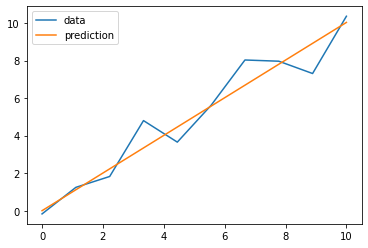

In [9]:
plt.plot(X, Y, label='data')
plt.plot(X, w*X, label='prediction')
plt.legend()
plt.show()